In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from statsmodels.formula.api import ols      
from statsmodels.stats.anova import _get_covariance,anova_lm 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from statsmodels.formula.api import ols      
from statsmodels.stats.anova import _get_covariance,anova_lm 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
%matplotlib inline 
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns

In [16]:
df = pd.read_excel("Master Theisis Data.xlsx")  

In [17]:
df

,Date,C_P_I,I_R,O_P,E_P_U,M_p,F_P,Taxes,G_s,H_c,N_s,F_R,T_p,Nasdaq
0,2007-01-01,202.416,3.15,54.51,55.216501,44.721733,52.472174,57.516719,40.304647,100.002230,61.908192,21.203617,50.287614,2463.929932
1,2007-02-01,203.499,3.16,59.28,38.357686,27.484565,35.011834,37.524405,15.547915,38.175005,36.156294,28.482204,20.558663,2416.149902
2,2007-03-01,205.352,3.11,60.44,55.677118,59.732664,39.432190,44.219923,11.552323,51.354806,44.058014,42.325367,22.403890,2421.639893
3,2007-04-01,206.686,2.97,63.98,40.691897,31.232595,35.619898,34.184564,23.071827,33.894986,33.509571,17.795893,27.831279,2525.090088
4,2007-05-01,207.949,2.78,63.46,52.437020,36.276646,52.972521,58.468692,28.405554,49.742612,38.465504,33.982754,14.308584,2604.520020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,2022-07-01,296.276,5.63,101.62,138.266430,161.917595,117.834775,124.455184,55.073651,201.773303,121.032182,89.679415,71.545074,12390.690430
187,2022-08-01,296.171,5.99,93.67,109.804015,120.393477,102.997344,114.025911,35.415193,104.205658,92.352643,141.953181,150.492302,11816.200195
188,2022-09-01,296.808,6.39,84.26,105.268276,149.003732,66.999427,70.534230,27.760461,100.882083,75.120021,57.532192,50.425833,10575.620117
189,2022-10-01 00:00:00,298.012,7.75,87.55,135.907198,205.143734,112.092491,118.724337,64.755707,140.937888,124.168889,112.382418,93.135999,10988.150391


In [18]:
df.isnull().sum()

Date      0
C_P_I     0
I_R       0
O_P       0
 E_P_U    0
M_p       0
F_P       0
Taxes     0
 G_s      0
 H_c      0
 N_s      0
F_R       0
T_p       0
Nasdaq    0
dtype: int64

In [19]:
df.shape

(191, 14)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    191 non-null    object 
 1   C_P_I   191 non-null    float64
 2   I_R     191 non-null    float64
 3   O_P     191 non-null    float64
 4    E_P_U  191 non-null    float64
 5   M_p     191 non-null    float64
 6   F_P     191 non-null    float64
 7   Taxes   191 non-null    float64
 8    G_s    191 non-null    float64
 9    H_c    191 non-null    float64
 10   N_s    191 non-null    float64
 11  F_R     191 non-null    float64
 12  T_p     191 non-null    float64
 13  Nasdaq  191 non-null    float64
dtypes: float64(13), object(1)
memory usage: 21.0+ KB


In [21]:
corr = df.corr(method='pearson')
corr

,C_P_I,I_R,O_P,E_P_U,M_p,F_P,Taxes,G_s,H_c,N_s,F_R,T_p,Nasdaq
C_P_I,1.000000,0.587152,-0.141061,0.203993,0.176344,0.047081,0.069938,-0.177929,0.097976,0.340408,-0.241740,0.278734,0.918743
I_R,0.587152,1.000000,0.080362,-0.022736,0.317262,-0.189812,-0.169544,-0.275036,-0.221788,0.228650,-0.100385,0.074417,0.452003
O_P,-0.141061,0.080362,1.000000,-0.208434,0.030167,-0.057396,-0.104608,0.184402,-0.163829,-0.110532,0.068277,-0.256696,-0.235426
E_P_U,0.203993,-0.022736,-0.208434,1.000000,0.635971,0.882188,0.891287,0.518285,0.912650,0.633160,0.467979,0.050352,0.249414
M_p,0.176344,0.317262,0.030167,0.635971,1.000000,0.515234,0.500471,0.368511,0.482000,0.663027,0.443498,0.201169,0.120275
F_P,0.047081,-0.189812,-0.057396,0.882188,0.515234,1.000000,0.987488,0.800844,0.901866,0.532207,0.473118,-0.000359,0.065093
Taxes,0.069938,-0.169544,-0.104608,0.891287,0.500471,0.987488,1.000000,0.716569,0.893174,0.548631,0.478468,0.024184,0.099658
G_s,-0.177929,-0.275036,0.184402,0.518285,0.368511,0.800844,0.716569,1.000000,0.633879,0.254064,0.381846,-0.136456,-0.226093
H_c,0.097976,-0.221788,-0.163829,0.912650,0.482000,0.901866,0.893174,0.633879,1.000000,0.505799,0.390103,-0.031160,0.139776
N_s,0.340408,0.228650,-0.110532,0.633160,0.663027,0.532207,0.548631,0.254064,0.505799,1.000000,0.290334,0.543179,0.289858


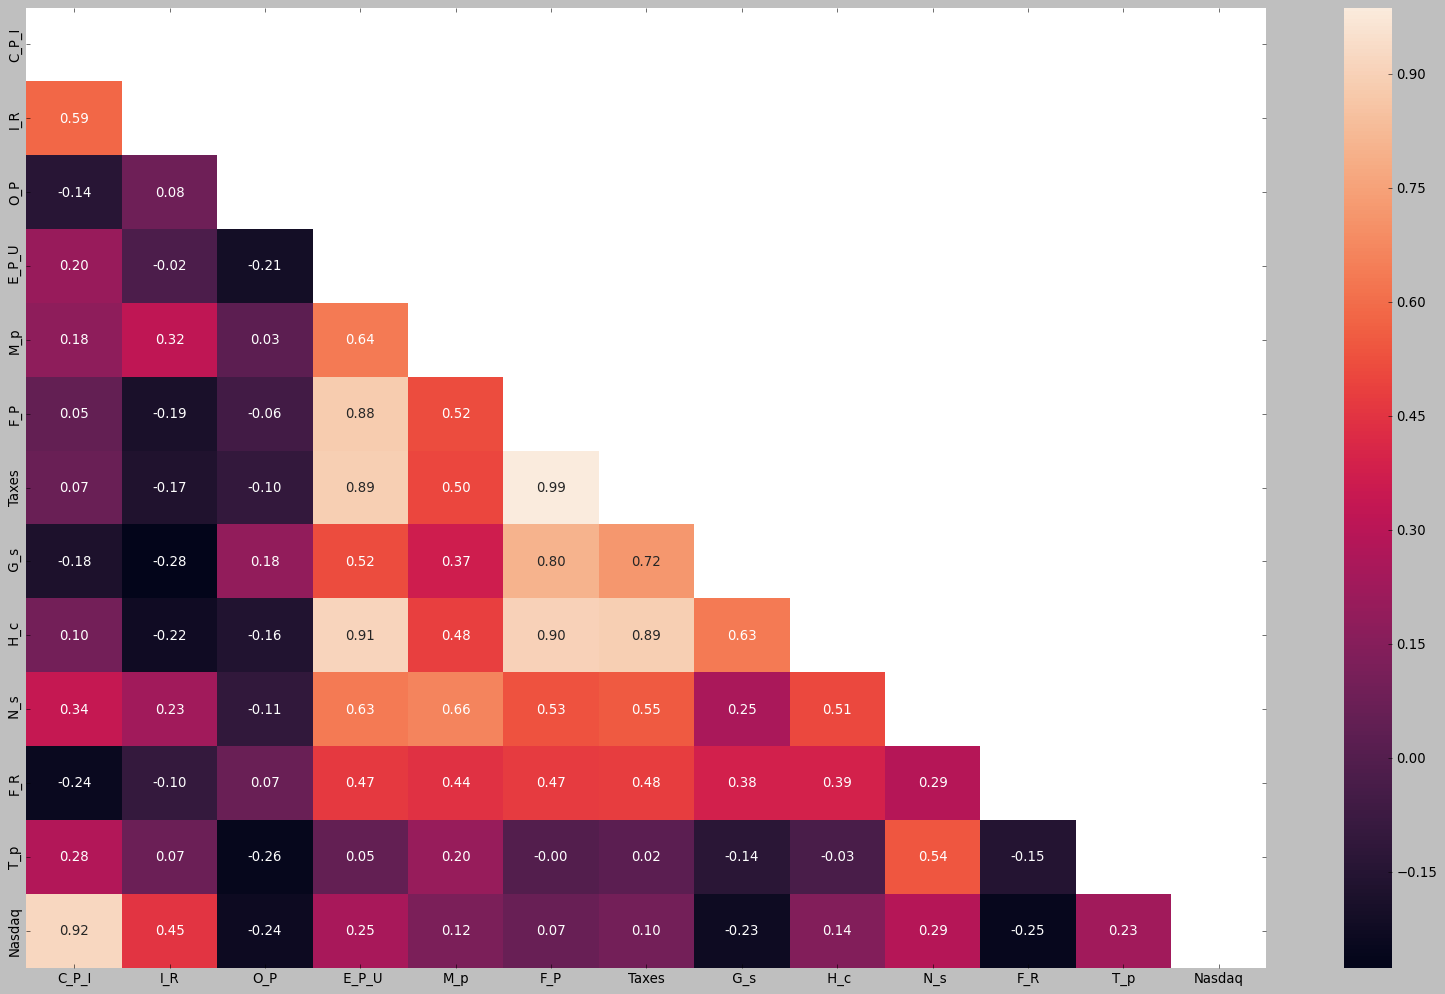

In [22]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(df.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

In [23]:
df=df.drop('Date',axis=1)

In [24]:
df.head()

,C_P_I,I_R,O_P,E_P_U,M_p,F_P,Taxes,G_s,H_c,N_s,F_R,T_p,Nasdaq
0,202.416,3.15,54.51,55.216501,44.721733,52.472174,57.516719,40.304647,100.002230,61.908192,21.203617,50.287614,2463.929932
1,203.499,3.16,59.28,38.357686,27.484565,35.011834,37.524405,15.547915,38.175005,36.156294,28.482204,20.558663,2416.149902
2,205.352,3.11,60.44,55.677118,59.732664,39.432190,44.219923,11.552323,51.354806,44.058014,42.325367,22.403890,2421.639893
3,206.686,2.97,63.98,40.691897,31.232595,35.619898,34.184564,23.071827,33.894986,33.509571,17.795893,27.831279,2525.090088
4,207.949,2.78,63.46,52.437020,36.276646,52.972521,58.468692,28.405554,49.742612,38.465504,33.982754,14.308584,2604.520020


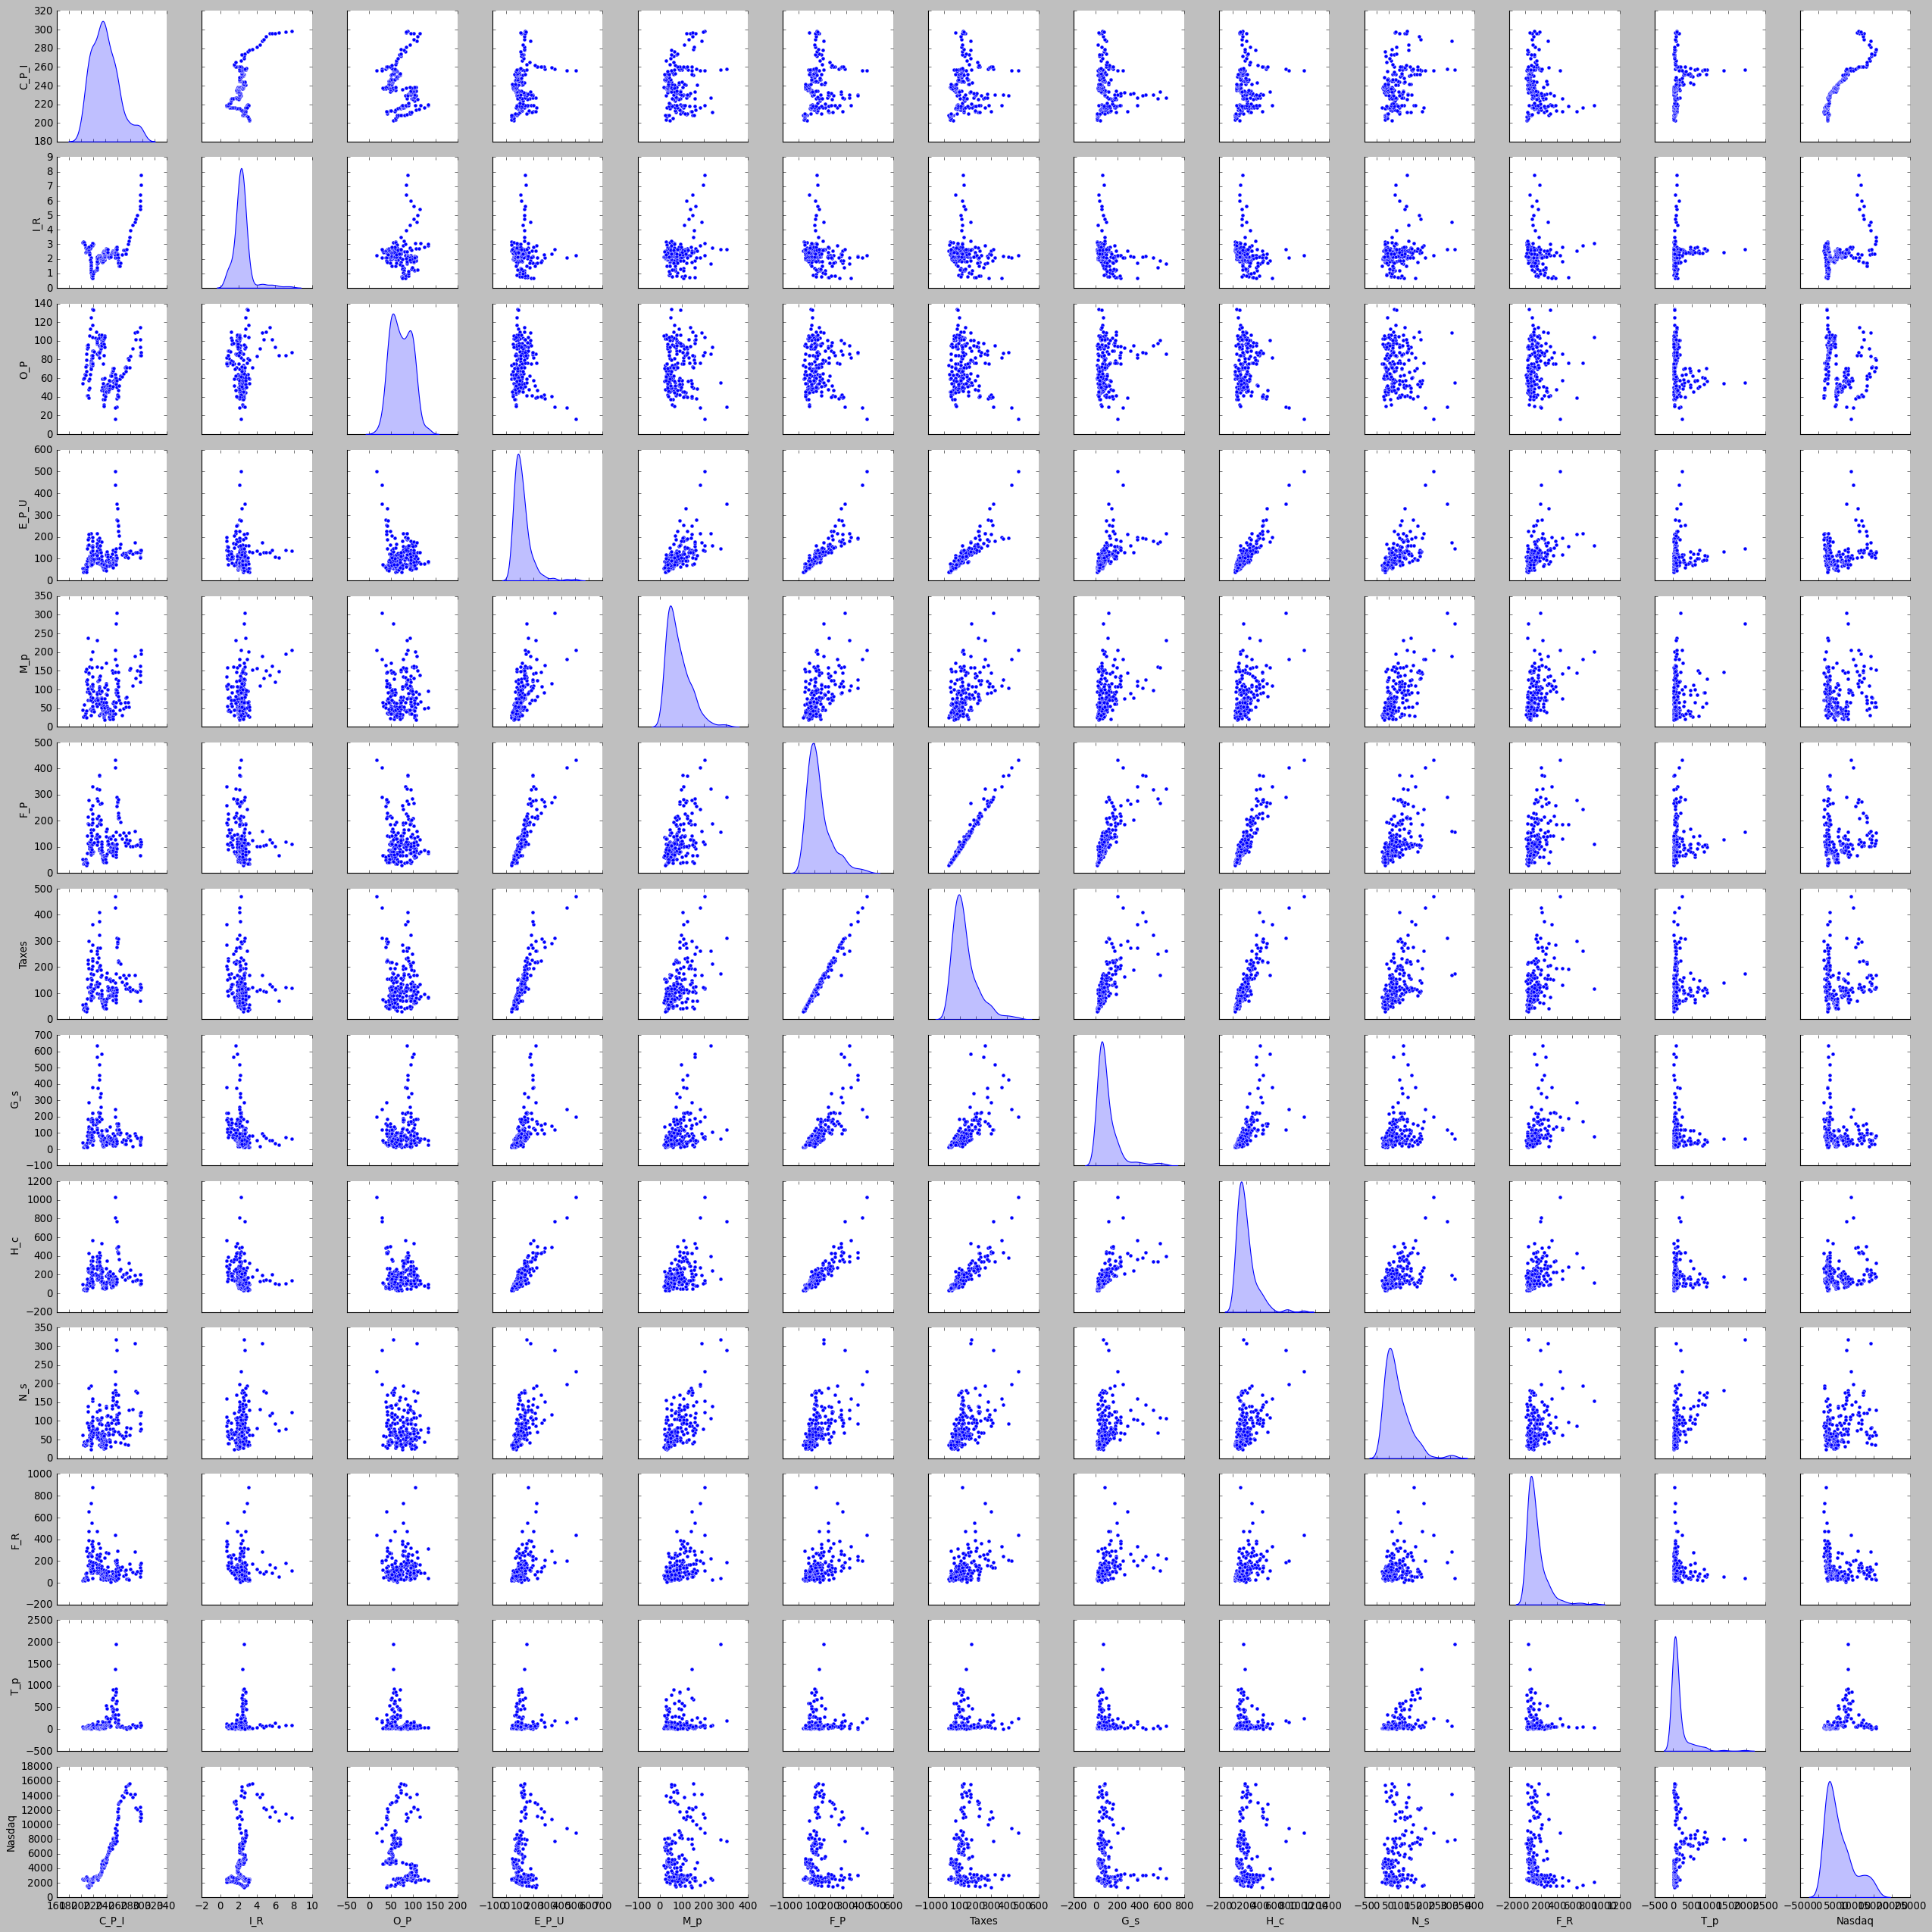

In [25]:
sns.pairplot(df,diag_kind='kde')

In [26]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = df.drop('A_p_stock_Index', axis=1)


# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = df[['A_p_stock_Index']]

KeyError: "['A_p_stock_Index'] not found in axis"

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [ ]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

In [ ]:

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

In [ ]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

In [ ]:
regression_model.score(X_train, y_train)

In [113]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

regression_model.score(X_test, y_test)

0.7397568635853108

In [114]:
# R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no 
# influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2
# Scikit does not provide a facility for adjusted R^2... so we use 
# statsmodel, a library that gives results similar to
# what you obtain in R language
# This library expects the X and Y to be given in one single dataframe

data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,C_P_I,I_R,O_P,E_P_U,M_p,F_P,Taxes,G_s,H_c,N_s,F_R,T_p,A_p_stock_Index
54,225.922,1.42,97.30,171.199325,160.645572,285.895281,249.667429,563.719874,343.905846,68.378951,260.249891,74.266387,230.64
189,298.012,7.75,87.55,135.907198,205.143734,112.092491,118.724337,64.755707,140.937888,124.168889,112.382418,93.135999,1012.93
118,241.353,2.53,45.66,123.151587,111.160611,141.444179,153.832036,116.638086,270.290846,138.720620,280.763314,540.418701,285.02
39,218.009,0.88,84.29,75.016580,42.102837,89.356970,91.151556,75.011176,153.963449,39.725717,243.397970,17.375581,178.90
28,213.856,2.29,59.03,107.720790,88.836010,101.924683,105.363018,88.475702,110.980702,56.695023,198.816306,18.718313,106.30


In [11]:
import statsmodels.formula.api as smf

In [12]:
lm1 = smf.ols(formula= 'A_p_stock_Index ~ C_P_I + I_R + O_P + E_P_U + M_p + F_P + Taxes + F_R + T_p', data = data_train).fit()

NameError: name 'data_train' is not defined

In [117]:
model_df = smf.ols(formula='Firearm_Check ~ No_Of_Mass_shooting_incedents + Sum_of_Killed + Sum_of_Injured + Sum_of_Killed', data=df).fit()
model_df.summary()

PatsyError: Error evaluating factor: NameError: name 'Sum_of_Injured' is not defined
    Firearm_Check ~ No_Of_Mass_shooting_incedents + Sum_of_Killed + Sum_of_Injured + Sum_of_Killed
                                                                    ^^^^^^^^^^^^^^